### Import necessary libraries :

In [71]:
import re
import nltk
import warnings
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('stopwords')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
#read the data :
data = pd.read_csv("Product Reviews.csv")
data.head()

,Unnamed: 0,stars,reviews
0,0,5,After my 13inch MacBook I have tried several w...
1,1,4,PROS:Best in its class.Boots in lightening 5-6...
2,2,1,The product promised a lot of features which m...
3,3,1,I already have a Asus Vivibook bought two year...
4,4,1,The battery backup is not even 50% of what's m...


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837 entries, 0 to 23836
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23837 non-null  int64 
 1   stars       23837 non-null  int64 
 2   reviews     23835 non-null  object
dtypes: int64(2), object(1)
memory usage: 558.8+ KB


In [74]:
#drop NaN values:
data.dropna(inplace=True)

In [75]:
#drop the first column which mentions index
data.drop('Unnamed: 0',axis=1,inplace=True)

In [76]:
# Count of each ratings in the dataset :  
data['stars'].value_counts()

5    13894
4     4471
1     3116
3     1626
2      728
Name: stars, dtype: int64

# Data Sampling

**In order to have an equally balanced dataset, lets us create a data frame with equal number of reviews.**

In [77]:
training_df = pd.DataFrame()
star1 = data[data['stars'] == 1][:728]
star2 = data[data['stars'] == 2][:728]
star3 = data[data['stars'] == 3][:728]
star4 = data[data['stars'] == 4][:728]
star5 = data[data['stars'] == 5][:728]


training_df = training_df.append(star1)
training_df = training_df.append(star2)
training_df = training_df.append(star3)
training_df = training_df.append(star4)
training_df = training_df.append(star5)

In [111]:
#Remainging data we can create them as a testing data : 

testing_df = pd.DataFrame()
star1 = data[data['stars'] == 1][728:]
star2 = data[data['stars'] == 2][728:]
star3 = data[data['stars'] == 3][728:]
star4 = data[data['stars'] == 4][728:]
star5 = data[data['stars'] == 5][728:]


testing_df = testing_df.append(star1)
testing_df = testing_df.append(star2)
testing_df = testing_df.append(star3)
testing_df = testing_df.append(star4)
testing_df = testing_df.append(star5)

ratings_of_test_data = testing_df['stars']
ratings_of_test_data.to_csv('Ratings of test data.csv')

testing_df.drop('stars',axis=1,inplace = True)

# Data Summarization :

In [79]:
# Count of each ratings : 
training_df['stars'].value_counts()

5    728
3    728
1    728
4    728
2    728
Name: stars, dtype: int64

In [80]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 2 to 1641
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    3640 non-null   int64 
 1   reviews  3640 non-null   object
dtypes: int64(1), object(1)
memory usage: 85.3+ KB


In [81]:
training_df.describe()

,stars
count,3640.000000
mean,3.000000
std,1.414408
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# Data Visualization:

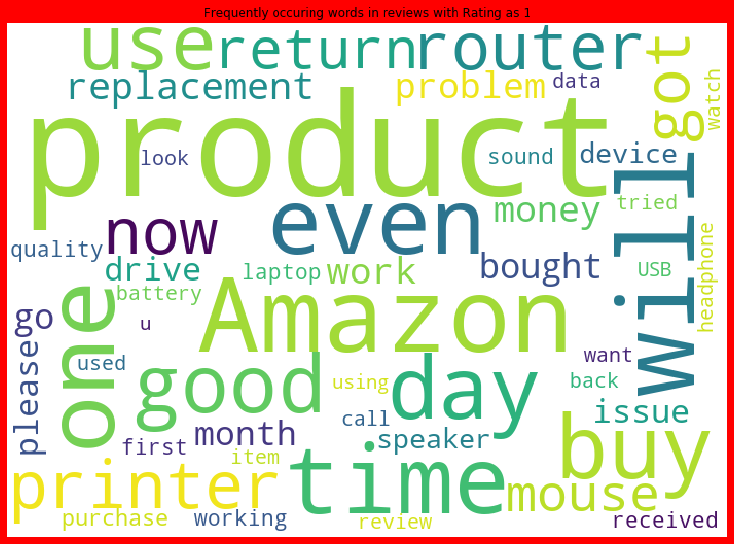

In [82]:
#Word cloud for Ratings :
star1 = training_df['reviews'][training_df['stars']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(star1))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(word_cloud)
plt.title("Frequently occuring words in reviews with Rating as 1")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

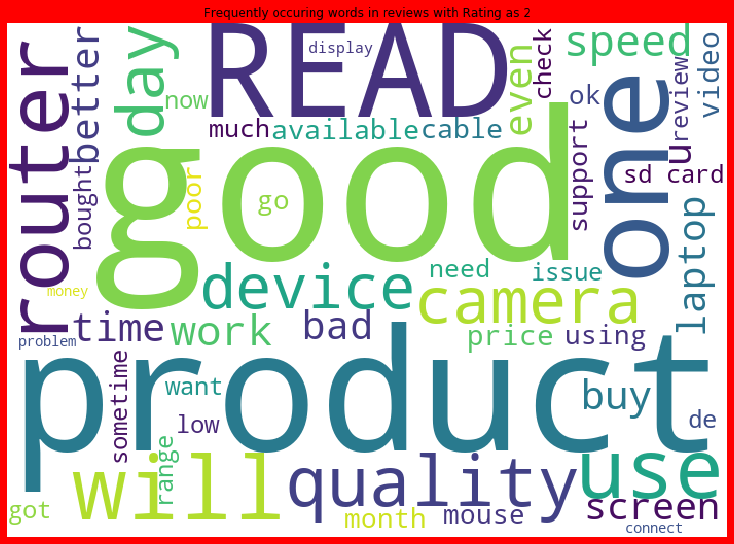

In [83]:
star2 = training_df['reviews'][training_df['stars']==2]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(star2))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(word_cloud)
plt.title("Frequently occuring words in reviews with Rating as 2")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

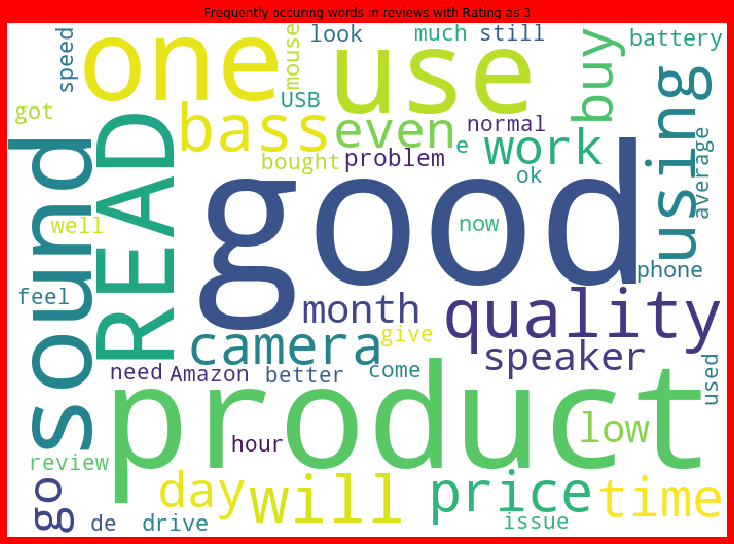

In [84]:
star3 = training_df['reviews'][training_df['stars']==3]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(star3))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Frequently occuring words in reviews with Rating as 3")
plt.tight_layout(pad=0)
plt.show()

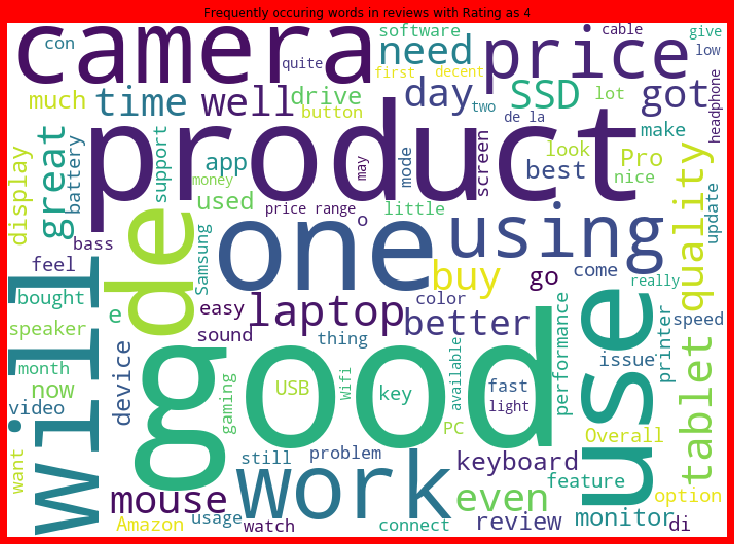

In [85]:
star4 = training_df['reviews'][training_df['stars']==4]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(star4))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Frequently occuring words in reviews with Rating as 4")
plt.tight_layout(pad=0)
plt.show()

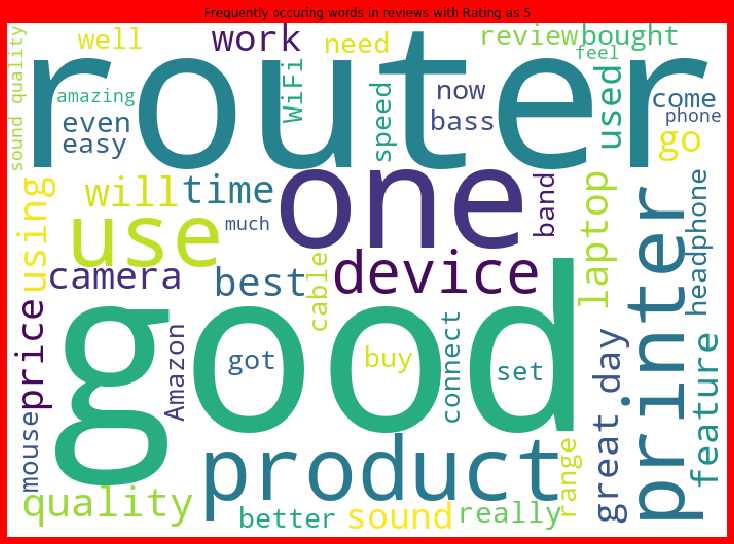

In [86]:
star5 = training_df['reviews'][training_df['stars']==5]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(star5))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(word_cloud)
plt.title("Frequently occuring words in reviews with Rating as 5")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [87]:
#Feature Generation : 


stop_words = list(set(stopwords.words('english')))
punctuation = string.punctuation

training_df['char_count'] = training_df['reviews'].apply(len)
training_df['word_count'] = training_df['reviews'].apply(lambda x: len(x.split()))
training_df['punctuation_count'] = training_df['reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
training_df['upper_case_word_count'] = training_df['reviews'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
training_df['stopword_count'] = training_df['reviews'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

training_df

,stars,reviews,char_count,word_count,punctuation_count,upper_case_word_count,stopword_count
2,1,The product promised a lot of features which m...,328,65,8,1,35
3,1,I already have a Asus Vivibook bought two year...,569,101,11,1,48
4,1,The battery backup is not even 50% of what's m...,136,21,7,0,9
5,1,Its been 30 days I bought this. Dead slow proc...,180,38,8,2,16
7,1,Bettery backup is low low standby,33,6,0,0,1
...,...,...,...,...,...,...,...
1636,5,The quality of both the mouse and the wire is ...,448,89,16,6,47
1637,5,Logitech has never failed me and this M90 USB ...,938,132,182,7,59
1638,5,I previously had a Dell Wired mouse along with...,984,179,16,8,77
1639,5,Works on any surface. No pad needed. Size is g...,307,57,9,1,27


In [88]:
training_df.describe()

,stars,char_count,word_count,punctuation_count,upper_case_word_count,stopword_count
count,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000
mean,3.000000,475.692308,83.674451,15.029396,3.427198,33.206593
std,1.414408,791.562235,135.486693,31.833086,8.229744,54.143374
min,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,112.000000,20.000000,3.000000,0.000000,6.000000
50%,3.000000,286.000000,50.000000,8.000000,1.000000,19.000000
75%,4.000000,525.000000,94.000000,16.000000,3.000000,39.000000
max,5.000000,19493.000000,3125.000000,843.000000,184.000000,987.000000


# Data Preprocessing:

In [89]:
# return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    


def lemmatization(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)


In [90]:
def cleaning_process(training_df):
    training_df['reviews'] = training_df['reviews'].apply(lambda x : x.lower())
    training_df['reviews'] = training_df['reviews'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))
    # Replace numbers with 'number'
    training_df['reviews'] =training_df['reviews'].str.replace(r'\d+(\.\d+)?', 'number')
    # Remove punctuation
    training_df['reviews'] = training_df['reviews'].str.replace(r'[^\w\d\s]', ' ')
    # Replace whitespace between terms with a single space
    training_df['reviews'] = training_df['reviews'].str.replace(r'\s+', ' ')
    # Remove leading and trailing whitespace
    training_df['reviews'] = training_df['reviews'].str.replace(r'^\s+|\s+?$', '')
    #Replace Special characters: 
    training_df['reviews'] = training_df['reviews'].str.replace(r'\_ ','')
    #Replace * :
    training_df['reviews'] = training_df['reviews'].str.replace(r'\* ','')
    #Replace nbsp with space
    training_df['reviews'] =training_df['reviews'].str.replace(r'nbsp',' ')
    training_df['reviews'] = training_df['reviews'].replace(r'read more','')
    training_df['reviews'] = training_df['reviews'].replace(r'[0-9]',' ')
    # clean text data
    training_df['reviews'] = training_df['reviews'].apply(lemmatization)
    
    return training_df

In [91]:
training_df = cleaning_process(training_df)

# Feature Engineering : 

In [92]:
#Feature Generation : 
nltk.download('stopwords')

stop_words = list(set(stopwords.words('english')))
punctuation = string.punctuation

training_df['clean_char_count'] = training_df['reviews'].apply(len)
training_df['clean_word_count'] = training_df['reviews'].apply(lambda x: len(x.split()))
training_df['punctuation_count'] = training_df['reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
training_df['upper_case_word_count'] = training_df['reviews'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
training_df['stopword_count'] = training_df['reviews'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

training_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,stars,reviews,char_count,word_count,punctuation_count,upper_case_word_count,stopword_count,clean_char_count,clean_word_count
2,1,product promise lot feature make buy it receiv...,328,65,0,0,2,178,29
3,1,already asus vivibook buy two year ago second ...,569,101,0,0,3,377,57
4,1,battery backup even number what s mentioned de...,136,21,0,0,2,103,13
5,1,number day buy this dead slow process take num...,180,38,0,0,4,116,21
7,1,bettery backup low low standby,33,6,0,0,0,30,5
...,...,...,...,...,...,...,...,...,...
1636,5,quality mouse wire good buy number price best ...,448,89,0,0,2,252,43
1637,5,logitech never fail mnumber usb exception awes...,938,132,0,0,3,566,83
1638,5,previously dell wired mouse along number bluet...,984,179,0,0,3,663,105
1639,5,work surface pad need size good hand large han...,307,57,0,0,0,183,30


In [93]:
training_df.drop('punctuation_count',axis=1,inplace=True)
training_df.drop('upper_case_word_count',axis=1,inplace=True)
training_df.drop('stopword_count',axis=1,inplace=True)
training_df

,stars,reviews,char_count,word_count,clean_char_count,clean_word_count
2,1,product promise lot feature make buy it receiv...,328,65,178,29
3,1,already asus vivibook buy two year ago second ...,569,101,377,57
4,1,battery backup even number what s mentioned de...,136,21,103,13
5,1,number day buy this dead slow process take num...,180,38,116,21
7,1,bettery backup low low standby,33,6,30,5
...,...,...,...,...,...,...
1636,5,quality mouse wire good buy number price best ...,448,89,252,43
1637,5,logitech never fail mnumber usb exception awes...,938,132,566,83
1638,5,previously dell wired mouse along number bluet...,984,179,663,105
1639,5,work surface pad need size good hand large han...,307,57,183,30


In [94]:
#Converting Text to vectors using TF-IDF vectoriser :
def vectorization(data):
    tfidf = TfidfVectorizer()
    features = tfidf.fit_transform(data['reviews'])

    return features

In [95]:
vectorised_data = vectorization(training_df)

In [96]:
'''
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(training_df["reviews"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = training_df["reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
training_df = pd.concat([training_df, doc2vec_df], axis=1)


tfidf_result = tfidf.fit_transform(training_df['reviews']).toarray()

tfidf_df = pd.DataFrame(tfidf_result,columns = tfidf.get_feature_names())

tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]

tfidf_df.index = training_df.index
training_df = pd.concat([training_df, tfidf_df], axis=1)'''

'\n# create doc2vec vector columns\nfrom gensim.test.utils import common_texts\nfrom gensim.models.doc2vec import Doc2Vec, TaggedDocument\n\ndocuments = [TaggedDocument(doc, [i]) for i, doc in enumerate(training_df["reviews"].apply(lambda x: x.split(" ")))]\n\n# train a Doc2Vec model with our text data\nmodel = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)\n\n# transform each document into a vector data\ndoc2vec_df = training_df["reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)\ndoc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]\ntraining_df = pd.concat([training_df, doc2vec_df], axis=1)\n\n\ntfidf_result = tfidf.fit_transform(training_df[\'reviews\']).toarray()\n\ntfidf_df = pd.DataFrame(tfidf_result,columns = tfidf.get_feature_names())\n\ntfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]\n\ntfidf_df.index = training_df.index\ntraining_df = pd.concat([training_df, tfidf_df], axis=1)'

In [97]:
#Split the data into training and testing data set: 
from sklearn.model_selection import train_test_split

X =vectorised_data
y= training_df.iloc[:,0]

In [117]:
X.shape

(3640, 13698)

# Model Prediction and Evaluation : 

In [98]:
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,100):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state

In [100]:
#Training multiple machine learning algorithms

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

classifiers = [svc,knc,mnb,dtc,rfc]

  
    
for i in range(len(classifiers)):
    state = calBestRandomStateOf(classifiers[i])
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=state)
    classifiers[i].fit(x_train,y_train)
    y_pred = classifiers[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("\n")
    print("*************************************************************************************")
    print("Random State:", state)
    print("Classifier : ",classifiers[i])
    print("Accuracy : ",round((accuracy*100),2),"% ")
    print("Classification Report : \n")
    print(classificationReport)
    print("Confusion Matrix :\n ")
    print(confusionMatrix)
    print("*************************************************************************************")
    print("\n")





*************************************************************************************
Random State: 95
Classifier :  SVC()
Accuracy :  75.69 % 
Classification Report : 

              precision    recall  f1-score   support

           1       0.79      0.84      0.82       166
           2       0.89      0.73      0.80       147
           3       0.65      0.68      0.67       114
           4       0.70      0.71      0.70       162
           5       0.76      0.81      0.78       139

    accuracy                           0.76       728
   macro avg       0.76      0.75      0.75       728
weighted avg       0.76      0.76      0.76       728

Confusion Matrix :
 
[[139   4  10   8   5]
 [ 13 107  13  12   2]
 [  6   9  78  15   6]
 [ 11   0  13 115  23]
 [  6   0   6  15 112]]
*************************************************************************************




*************************************************************************************
Random State: 83
Classifie

In [105]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

model = [svc,knc,mnb,dtc,rfc]

for i in range(len(model)):
    cv_score = cross_val_score(model[i],x_train,y_train,cv=5,scoring='accuracy')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

*************************************************************************************
Score for  SVC()  : 
Score :  [0.67409949 0.71698113 0.68213058 0.66666667 0.6838488 ]
Mean :  0.6847453331211355
Standard Deviation :  0.017245055388683355
*************************************************************************************

*************************************************************************************
Score for  KNeighborsClassifier()  : 
Score :  [0.46655232 0.49399657 0.46907216 0.4742268  0.49312715]
Mean :  0.479395000383135
Standard Deviation :  0.01183201950386156
*************************************************************************************

*************************************************************************************
Score for  MultinomialNB()  : 
Score :  [0.62435678 0.63121784 0.62199313 0.61168385 0.59621993]
Mean :  0.617094304256335
Standard Deviation :  0.01217562034713258
**************************************************************************

In [103]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV

param_dict = {'C': [0.001, 0.01, 0.1, 1, 10],  
              'gamma': ['scale','auto'], 
              'kernel': ['linear','rbf','sigmoid','poly'],
              'class_weight':['dict','balanced'],
              'decision_function_shape':['ovo','ovr']
             }

gridsearch = GridSearchCV(svc,param_dict,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf'}

# Final Model Selection : 

In [106]:
#We will create the final model with SVC as our classifier :
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=95)
svc = SVC(C=10,class_weight='balanced',decision_function_shape='ovo',gamma='scale',kernel='rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
classificationReport = classification_report(y_test,y_pred)
confusionMatrix = confusion_matrix(y_test,y_pred)

print("*************************************************************************************")
print("Classifier : ",svc)
print("Accuracy : ",round((accuracy*100),2),"% ")
print("Classification Report : \n")
print(classificationReport)
print("Confusion Matrix :\n ")
print(confusionMatrix)
print("*************************************************************************************")
print("\n")

*************************************************************************************
Classifier :  SVC(C=10, class_weight='balanced', decision_function_shape='ovo')
Accuracy :  75.96 % 
Classification Report : 

              precision    recall  f1-score   support

           1       0.81      0.82      0.82       166
           2       0.85      0.75      0.80       147
           3       0.64      0.72      0.67       114
           4       0.73      0.69      0.71       162
           5       0.75      0.82      0.79       139

    accuracy                           0.76       728
   macro avg       0.76      0.76      0.76       728
weighted avg       0.76      0.76      0.76       728

Confusion Matrix :
 
[[136   8  10   6   6]
 [ 10 110  13  13   1]
 [  6   9  82  11   6]
 [ 10   1  16 111  24]
 [  5   1   8  11 114]]
*************************************************************************************




In [ ]:
#save the model 

import joblib

joblib.dump(svc,'ratingsclassifiermodel.obj')

gradient_from_joblib = joblib.load('ratingsclassifiermodel.obj')

